The primary goal is to perform a comprehensive analysis of customer satisfaction to identify key factors influencing satisfaction and areas needing improvement. This involves:

***Understanding Satisfaction Drivers***: Identifying which aspects (product quality, delivery time, customer service, website usability) most significantly impact overall customer satisfaction.

***Demographic and Behavioral Insights***: Analyzing how satisfaction varies across different demographic groups (age, gender) and purchasing behaviors (purchase amount, frequency, discount usage).

***Loyalty Program Effectiveness***: Evaluating the impact of loyalty program membership on customer satisfaction and retention.

***Root Cause Analysis***: Identifying the root causes of dissatisfaction to provide actionable recommendations for enhancing customer experience.

***Net Promoter Score (NPS)***: Calculating the NPS to gauge overall customer loyalty and identify areas to convert detractors into promoters.

In [1]:
import pandas as pd

data = pd.read_csv("E:\\Customer Satisfaction Analysis\\data.csv")

data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [2]:
data.describe()

,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


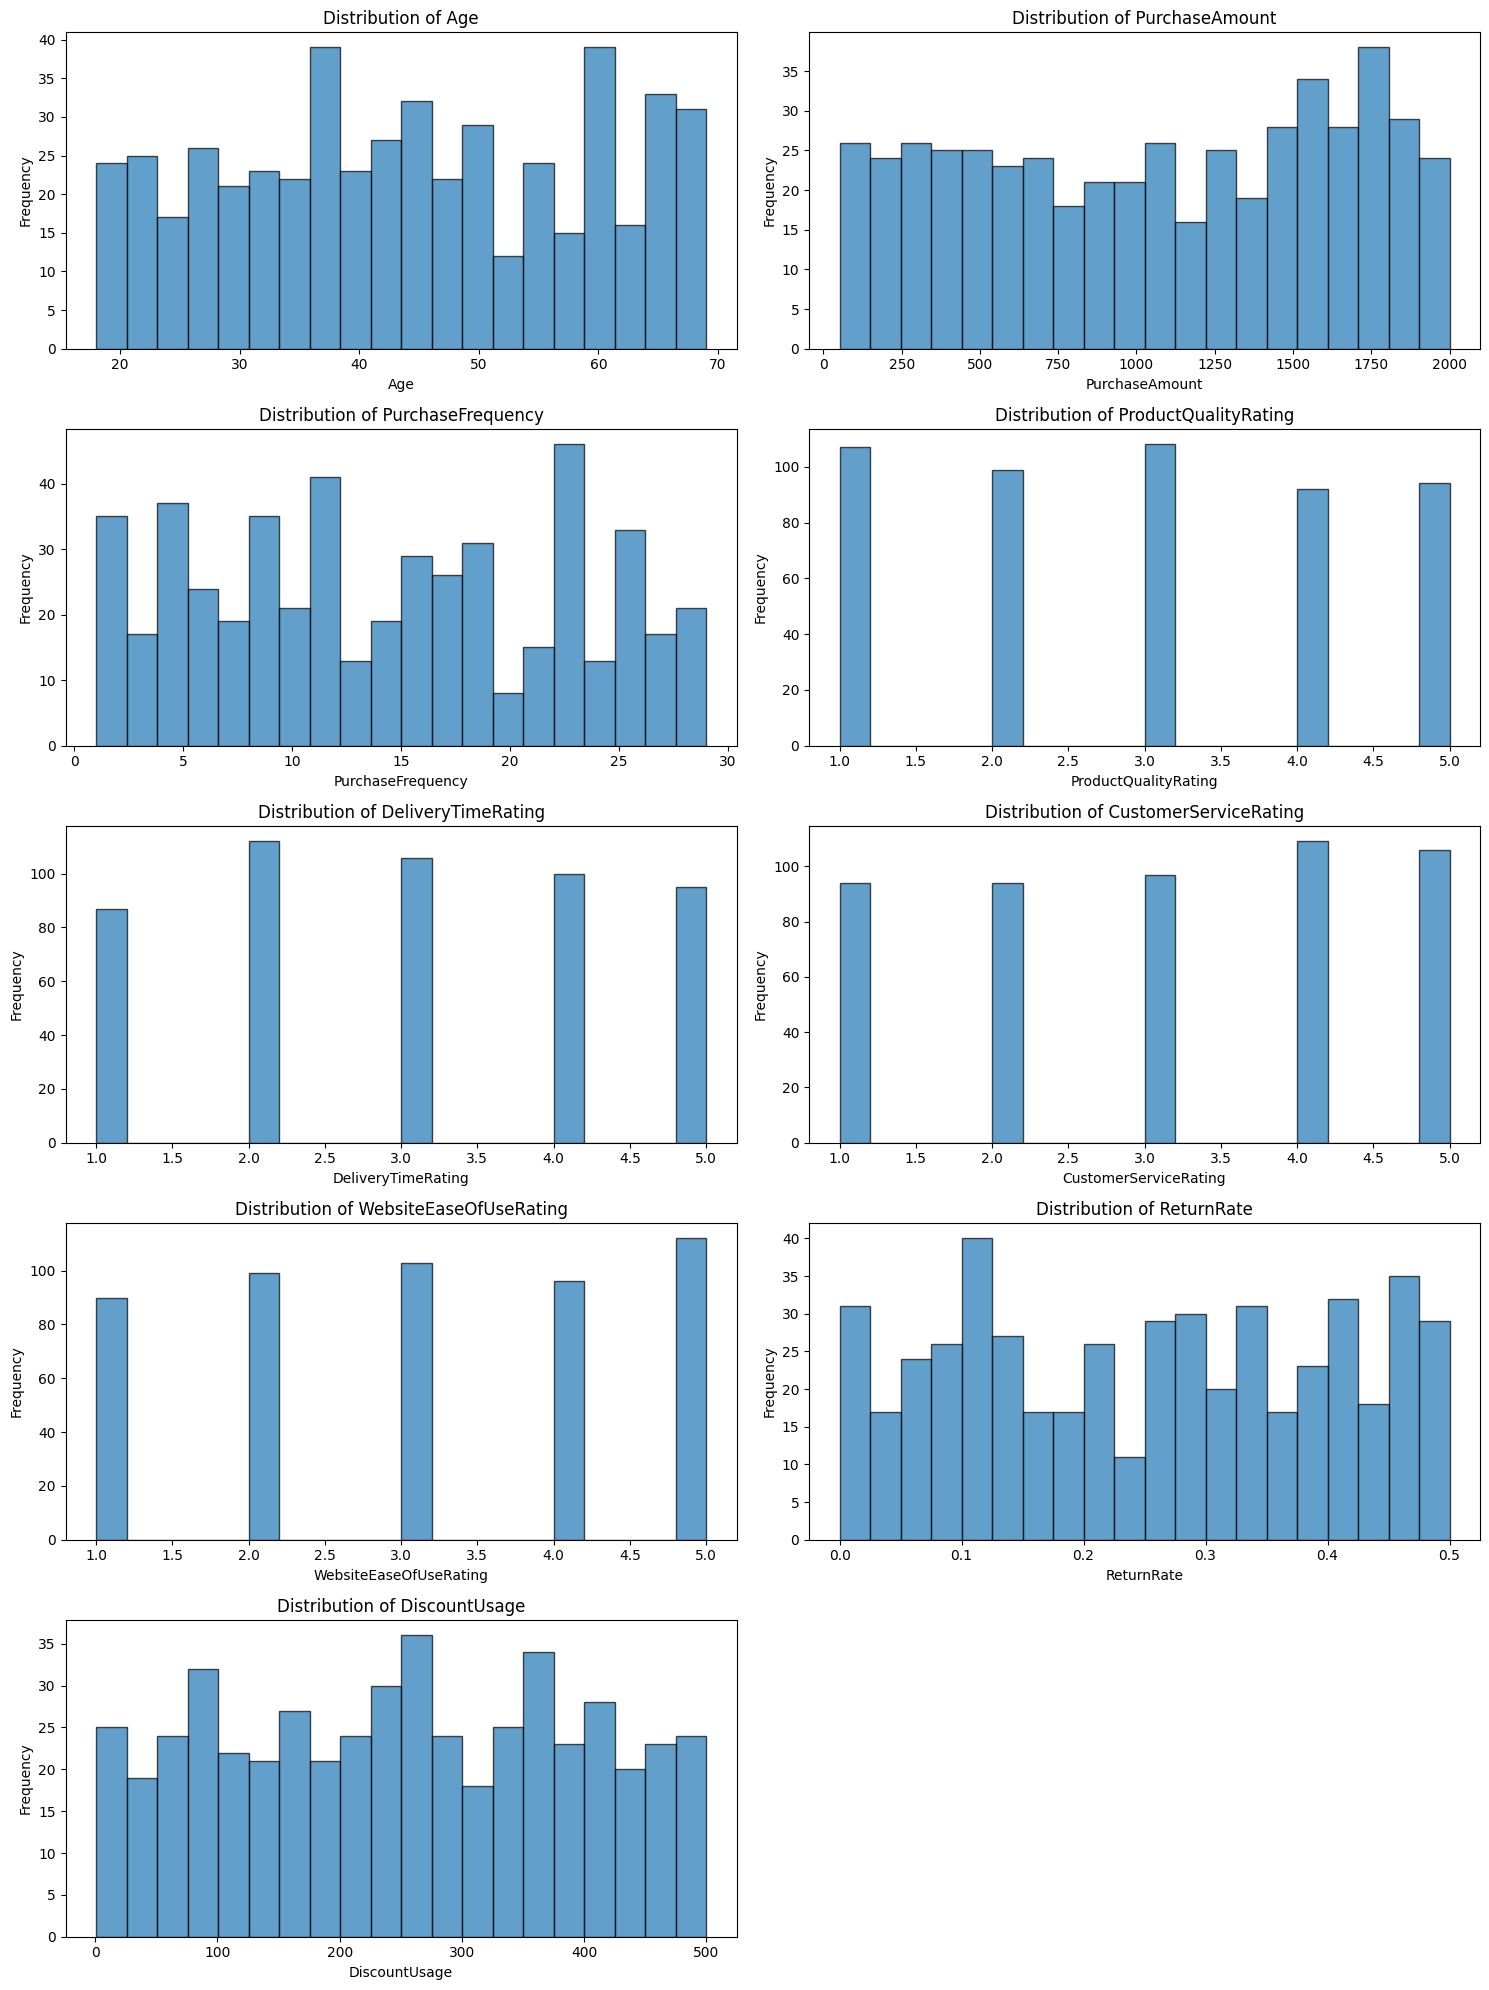

In [9]:
import matplotlib.pyplot as plt

numeric_cols = ["Age" , "PurchaseAmount" , "PurchaseFrequency" ,"ProductQualityRating", "DeliveryTimeRating", "CustomerServiceRating", "WebsiteEaseOfUseRating", "ReturnRate", "DiscountUsage"  ]

plt.figure(figsize=(15,20))

for i, col in enumerate(numeric_cols,1):
    plt.subplot(5,2,i)
    plt.hist(data[col], bins=20,edgecolor="k",alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()

- The Age Distribution is relativley even with slight peaks in 30s and 60s.
- Purchase Amounts are right skewed, indicating most customers spend less than $1000.
- Purchase Frequency is varied with notable peaks around 10-20 purchases
- Return Rates vary between 0.1 and 0.4.
- Discount Usage is evenly spread.
- All other metrics show vague trends.

These findings suggest that customer experiences and behaviours are diverse, with varying levels of satisfaction across different service aspects

Now, let's segment the customers based on demographic and behavorial factors and analyze their satisfaction ratings

In [14]:
import pandas as pd

bins = [18,30,40,50,60,70]
labels = ["18-29" , "30-39", "40-49", "50-59","60-69"]
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels,right=False)

num_col = ["ProductQualityRating", "DeliveryTimeRating", "CustomerServiceRating", "WebsiteEaseOfUseRating"]

mean_ratings_age_gender = data.groupby(["AgeGroup" ,"Gender"])[num_col].mean()

mean_ratings_age_gender.reset_index(inplace=True)

print(mean_ratings_age_gender)

  AgeGroup  Gender  ProductQualityRating  DeliveryTimeRating  \
0    18-29  Female              3.052632            3.210526   
1    18-29    Male              2.933333            3.000000   
2    30-39  Female              2.929825            2.859649   
3    30-39    Male              3.080000            2.820000   
4    40-49  Female              3.090909            2.890909   
5    40-49    Male              2.857143            3.166667   
6    50-59  Female              2.945946            2.945946   
7    50-59    Male              2.833333            2.895833   
8    60-69  Female              2.900000            3.300000   
9    60-69    Male              2.673469            2.938776   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0               3.175439                2.912281  
1               3.333333                3.355556  
2               2.912281                3.070175  
3               2.980000                2.880000  
4               3.036364                

C:\Users\rohan\AppData\Local\Temp\ipykernel_14564\273507991.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = data.groupby(["AgeGroup" ,"Gender"])[num_col].mean()


The data shows mean satisfaction ratings by age group and gender for different aspects of service. Here are some insights:

Younger customers **(18-29)** generally rate product quality slightly higher.

Females in the **40-49** age group give the highest ratings, while males in the **60-69** age group give the lowest.

Delivery time satisfaction is relatively consistent across age groups, with minor variations.

The highest ratings for delivery time satisfaction are from females aged **60-69**, while the lowest are from males aged **30-39**.

Customer service ratings are fairly consistent, with a slight peak among younger males **(18-29)**.

Males in the **60-69** age group rate customer service the lowest.

In [15]:
loyal_cols = ["ProductQualityRating", "DeliveryTimeRating", "CustomerServiceRating", "WebsiteEaseOfUseRating", "ReturnRate"]

mean_ratings_loyalty = data.groupby('LoyaltyProgramMember')[loyal_cols].mean()

mean_ratings_age_gender.reset_index(inplace=True)
print(mean_ratings_loyalty)

                      ProductQualityRating  DeliveryTimeRating  \
LoyaltyProgramMember                                             
No                                2.920502            2.916318   
Yes                               2.946360            3.091954   

                      CustomerServiceRating  WebsiteEaseOfUseRating  \
LoyaltyProgramMember                                                  
No                                 2.987448                3.108787   
Yes                                3.160920                3.057471   

                      ReturnRate  
LoyaltyProgramMember              
No                      0.251883  
Yes                     0.252644  


**Product Quality Rating**: Loyalty program members rate product quality slightly higher (2.95) compared to non-members (2.92).

**Delivery Time Rating**: Loyalty program members are more satisfied with delivery time (3.09) than non-members (2.92).

**Customer Service Rating**: Members rate customer service higher (3.16) compared to non-members (2.99).

**Website Ease of Use Rating**: Non-members rate the website slightly higher (3.11) than members (3.06).

**Return Rate**: The return rates are almost identical between members (0.25) and non-members (0.25).

**Discount Usage:** Members use slightly more discounts ($260) compared to non-members ($241).

## Calculation of Net Promoter Score:

NPS is a metric used to gauge customer loyalty and satisfaction by asking customers how likely they are to recommed a comapany's product/service to others on a scale of 0-10. Respondents are classified into 3 categories:

1. Promoters(9-10)
2. Passives(7-8)
3. Detractors(0-6)

NPS ic calculated by subtracting %Detractors from %Promoters
High NPS = Customer Loyalty
Low NPS = Customer dissatisfaction

In [17]:
data['NPS_Category'] = pd.cut(data["CustomerServiceRating"], bins=[0,6,8,10], labels=["Detractors" , "Passives", "Promoters"])

nps = data["NPS_Category"].value_counts(normalize=True)*100

nps_score = nps["Promoters"] - nps["Detractors"]

print(nps , nps_score)

NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64 -100.0


This results in an NPS score of -100, which indicates extremely low customer satisfaction. This score is a critical indicator that significant improvements are needed in customer service to convert detractors into promoters.

C:\Users\rohan\AppData\Local\Temp\ipykernel_14564\395987972.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


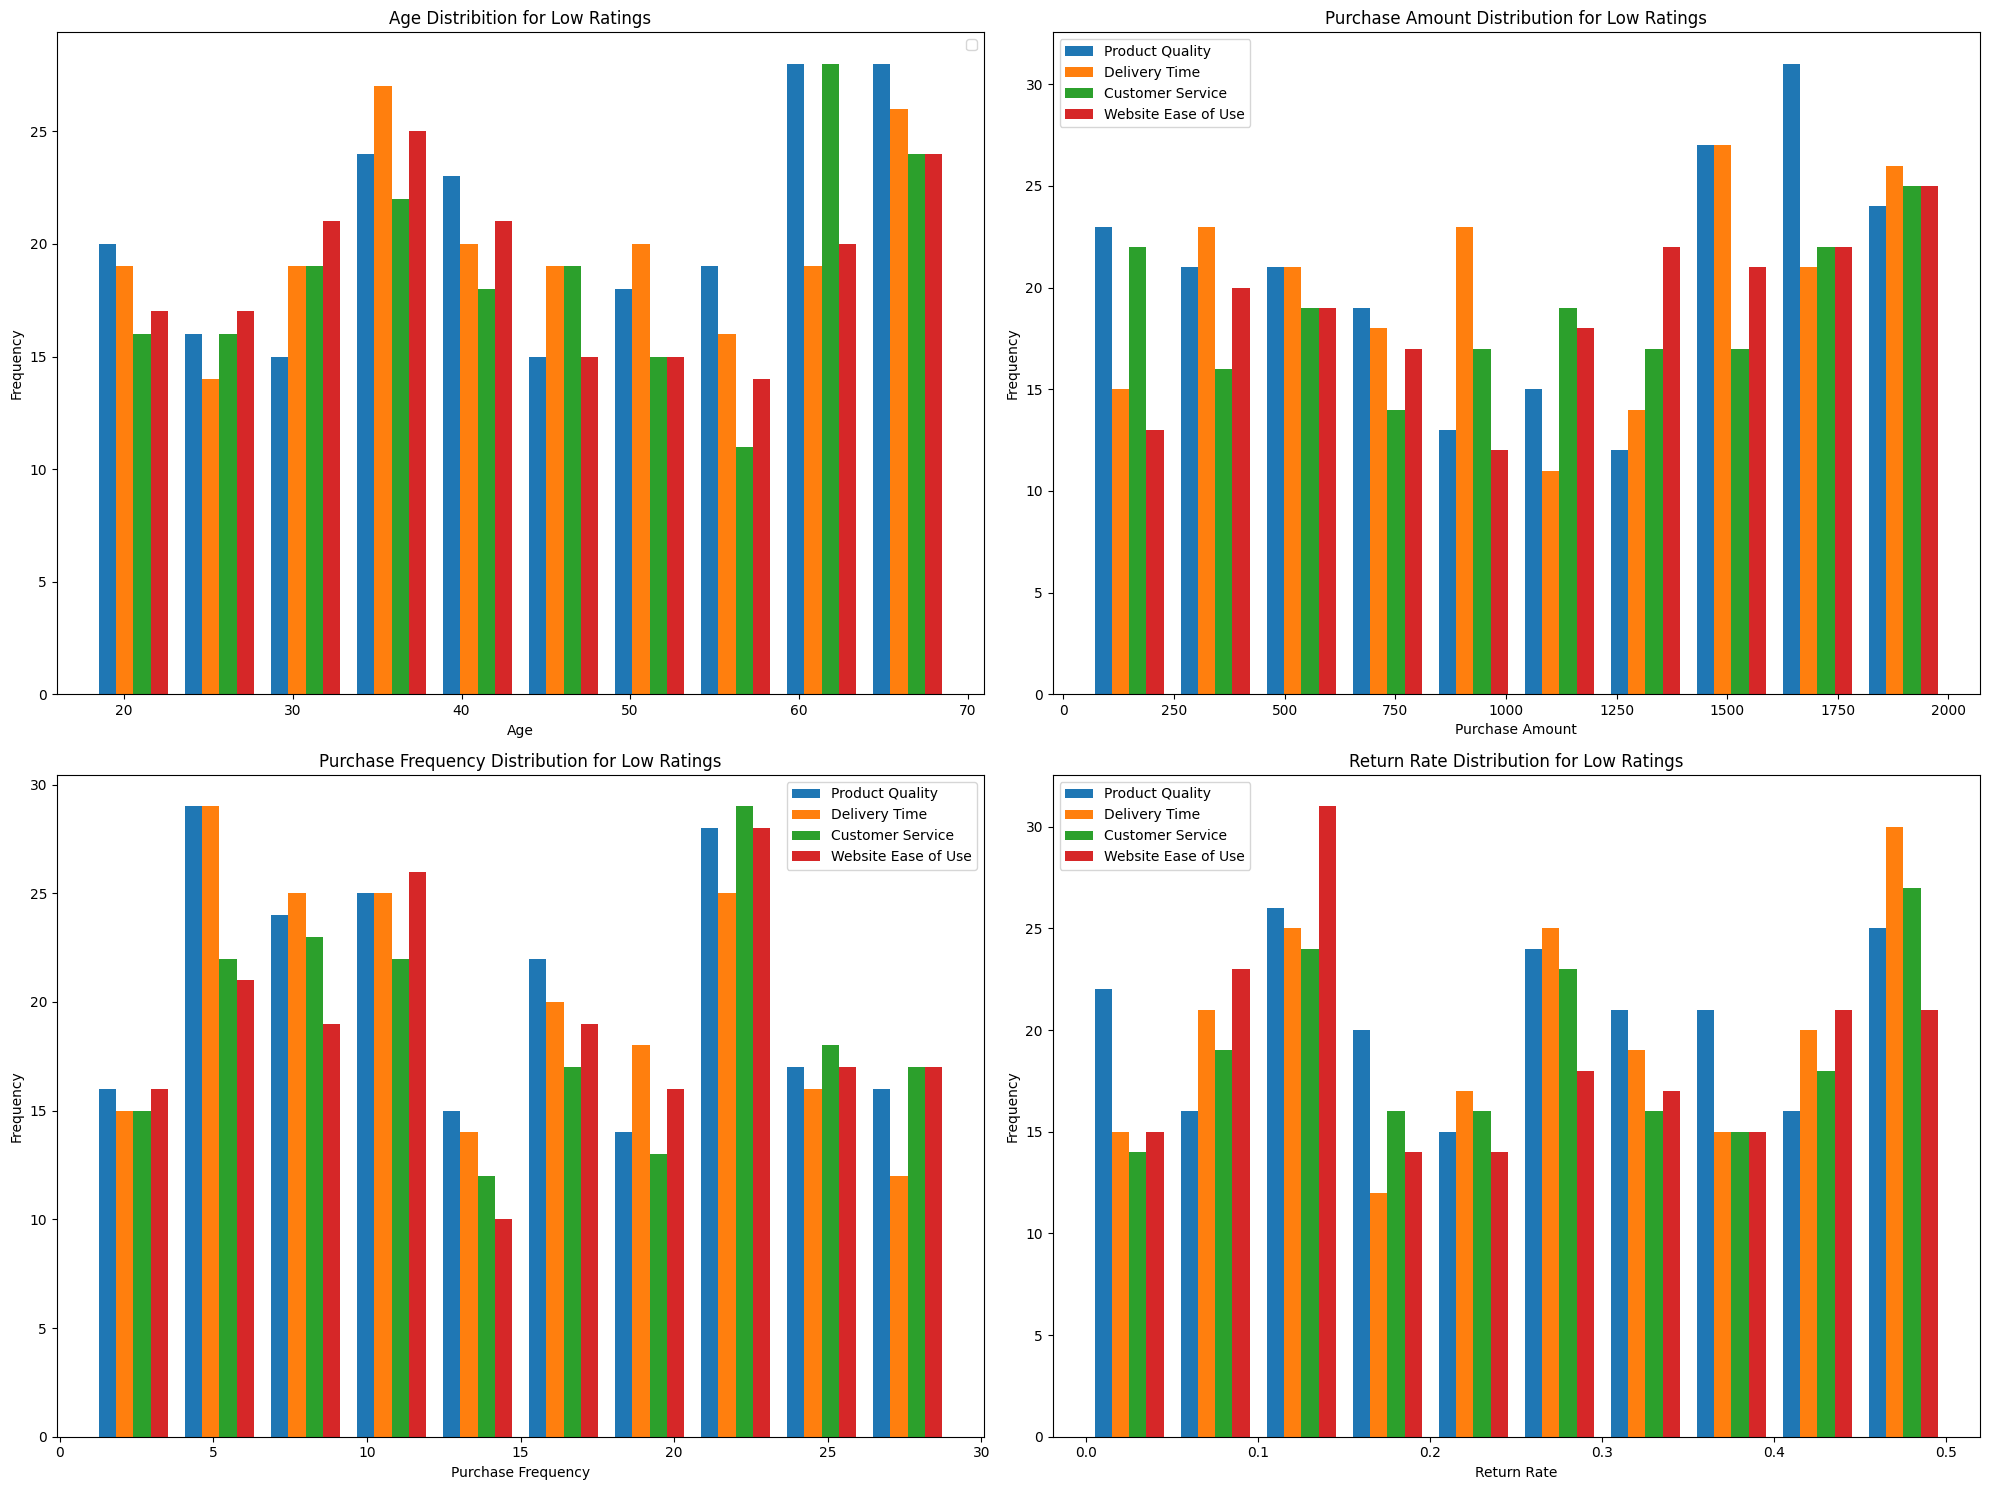

In [20]:
low_rating_threshold = 2

# Filter rows based on low ratings for each category
low_product_quality = data[data["ProductQualityRating"] <= low_rating_threshold]
low_delivery_time = data[data["DeliveryTimeRating"] <= low_rating_threshold]
low_customer_service = data[data["CustomerServiceRating"] <= low_rating_threshold]
low_website_ease_of_use = data[data["WebsiteEaseOfUseRating"] <= low_rating_threshold]

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.hist([low_product_quality["Age"], low_delivery_time["Age"], low_customer_service["Age"], low_website_ease_of_use["Age"]])
plt.title("Age Distribition for Low Ratings")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

The histograms indicate several key insights for root cause analysis of low ratings across different aspects of customer satisfaction. Customers giving low ratings span a wide age range, with notable peaks around ages 30-40 and 50-60, which suggests age-related dissatisfaction trends. Purchase amount and frequency distributions reveal that low ratings are not limited to low spenders or infrequent buyers; even high spenders and frequent buyers express dissatisfaction, which shows service quality issues. The return rate distribution shows that higher return rates correlate with low ratings, particularly for product quality and website ease of use, which indicates dissatisfaction with product and website experiences.